### Project Name :- Black Friday Sales Prediction

Problem Statement:-

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

### Name:- Krishanu Dutta
Email :- Krishanudutta674@gmail.com

#### ===========================================================================================================================================================

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

##### Data Load

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### As we can see we have 550068 rows and 12 features in which the Purchase column is the target variabel in which we have to apply our ML algo

<IPython.core.display.Javascript object>

<AxesSubplot:>

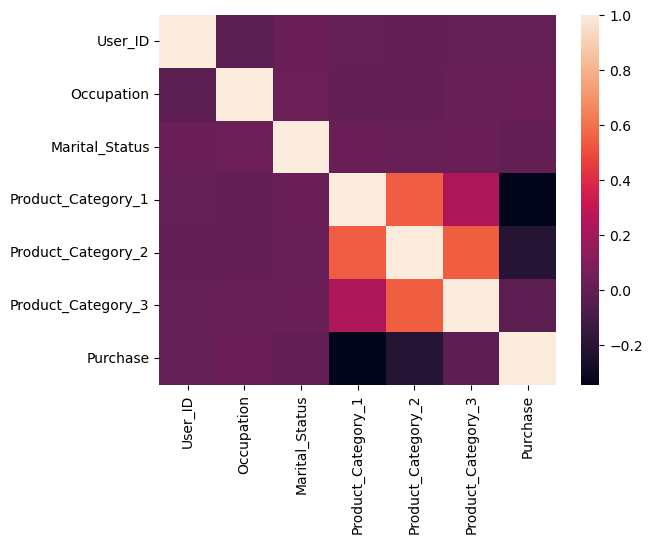

In [6]:
sns.heatmap(data=df.corr())

#### from the above heatmap we see that there are no such columns which has correlation greater than 0.75

In [7]:
#We don't need user_id column
df.drop(columns=['User_ID','Product_ID'],inplace=True)

In [8]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Product category 2 and 3 have many null values which has to be filled with either mean,median. we can choose any 

In [10]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].median())

In [11]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mean())

In [12]:
Fomatted_df=df

In [13]:
from sklearn import preprocessing
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['Stay_In_Current_City_Years'] = le.fit_transform(res_df['Stay_In_Current_City_Years'])
    res_df['Age'] = le.fit_transform(res_df['Age'])
    
    return res_df

In [14]:
encoded=preprocessor(Fomatted_df)

#Age Description:-
0-17 == 0
18-25 == 1
26-35 == 2
36-45 == 3
46-50 == 4
51-55 == 5
55+ == 6

### Plots

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

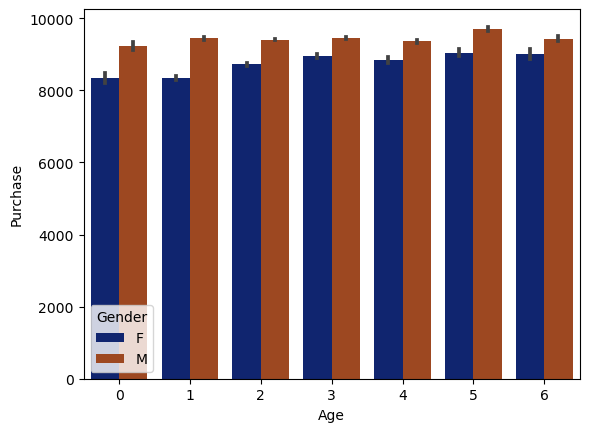

In [15]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=encoded,palette='dark')

#### From the above we can say that male purchasing more than women.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

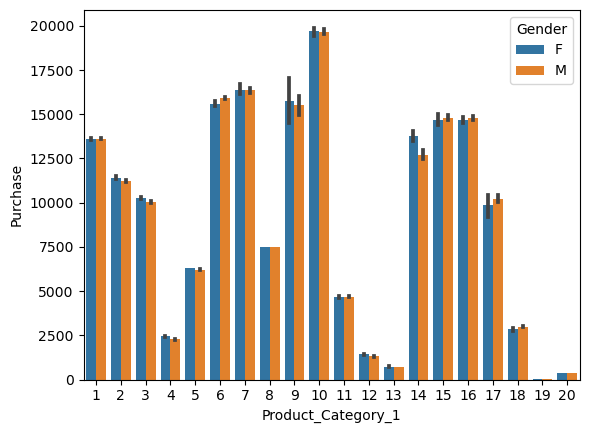

In [16]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=encoded)

#### product no 10 from product category 1 has the highest purchase 

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

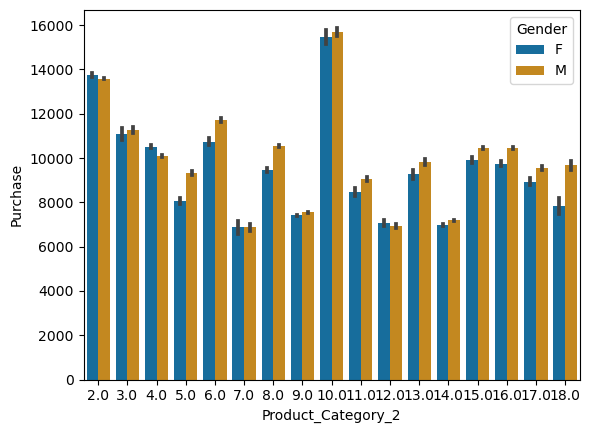

In [17]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=encoded,palette='colorblind')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

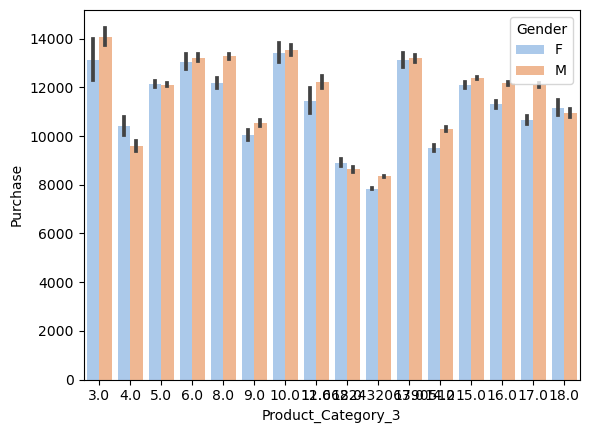

In [18]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=encoded,palette='pastel')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

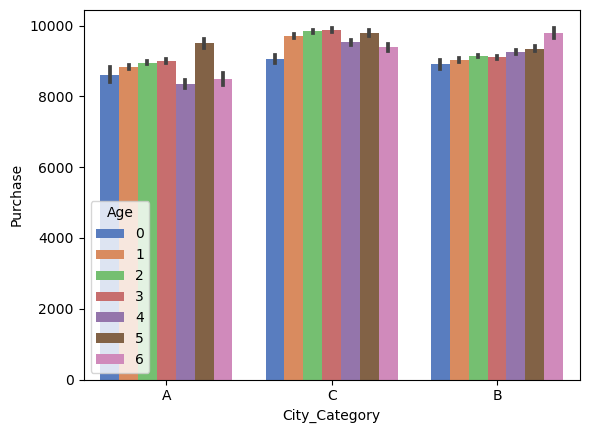

In [19]:
sns.barplot(x='City_Category',y='Purchase',hue='Age',data=encoded,palette='muted')

#### from above we can say that peoples from age 18-45 from city category C is purchasing the most 

In [20]:
encoded.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [21]:
Q1,Q3 = np.percentile(encoded['Purchase'] , [25,75])
IQR = Q3- Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

In [22]:
print(IQR,lower_range,upper_range)

6231.0 -3523.5 21400.5


In [1]:
sns.boxplot(encoded['Purchase'])
plt.axhline(upper_range)

<IPython.core.display.Javascript object>

NameError: name 'encoded' is not defined

In [24]:
df_final = encoded[(encoded.Purchase<upper_range)]

In [25]:
df_final

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0,10,A,2,0,3,9.0,12.668243,8370
1,F,0,10,A,2,0,1,6.0,14.000000,15200
2,F,0,10,A,2,0,12,9.0,12.668243,1422
3,F,0,10,A,2,0,12,14.0,12.668243,1057
4,M,6,16,C,4,0,8,9.0,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,5,13,B,1,1,20,9.0,12.668243,368
550064,F,2,1,C,3,0,20,9.0,12.668243,371
550065,F,2,15,B,4,1,20,9.0,12.668243,137
550066,F,6,1,C,2,0,20,9.0,12.668243,365


In [26]:
le = preprocessing.LabelEncoder()
df_final['Gender'] = le.fit_transform(df_final['Gender'])
df_final['City_Category'] = le.fit_transform(df_final['City_Category'])


C:\Users\kishor\AppData\Local\Temp\ipykernel_2344\410441565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Gender'] = le.fit_transform(df_final['Gender'])
C:\Users\kishor\AppData\Local\Temp\ipykernel_2344\410441565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['City_Category'] = le.fit_transform(df_final['City_Category'])


In [27]:
df_final

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,12.668243,8370
1,0,0,10,0,2,0,1,6.0,14.000000,15200
2,0,0,10,0,2,0,12,9.0,12.668243,1422
3,0,0,10,0,2,0,12,14.0,12.668243,1057
4,1,6,16,2,4,0,8,9.0,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,9.0,12.668243,368
550064,0,2,1,2,3,0,20,9.0,12.668243,371
550065,0,2,15,1,4,1,20,9.0,12.668243,137
550066,0,6,1,2,2,0,20,9.0,12.668243,365


### Model Building

## Linear Regression

In [28]:
X = df_final.iloc[:, 0:9].values
y = df_final.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)

3492.730414304226

In [33]:
#Try with default values
x_train_new = sm.add_constant(X_train)
final= sm.OLS(y_train,x_train_new)
res= final.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8369.
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:55:29   Log-Likelihood:            -4.3111e+06
No. Observations:              437912   AIC:                         8.622e+06
Df Residuals:                  437902   BIC:                         8.622e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9191.0882      6.896   1332.883      0.0

In [34]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4554.1111642903425


#### we can see that LinearRegression isn't giving good result

## Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 1) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
model_dt_cv = DecisionTreeRegressor(random_state=1, max_depth=29,min_samples_split=4, min_samples_leaf=4)
model_dt_cv.fit(x_train, y_train)
model_dt_cv_score_train = model_dt_cv.score(x_train, y_train)
print("Training score: ",model_dt_cv_score_train)
model_dt_cv_score_test = model_dt_cv.score(x_test, y_test)
print("Testing score: ",model_dt_cv_score_test)

Training score:  0.7359291764438765
Testing score:  0.6189910017557039


In [43]:
for i in range(51,500):
    model_dt_cv = DecisionTreeRegressor(random_state=1, max_depth=i,min_samples_split=4, min_samples_leaf=4)
    model_dt_cv.fit(x_train, y_train)
    model_dt_cv_score_train = model_dt_cv.score(x_train, y_train)
    model_dt_cv_score_test = model_dt_cv.score(x_test, y_test)
    if model_dt_cv_score_train>0.70:
        print(f' i == {i}')
        print("Training score: ",model_dt_cv_score_train)
        print("Testing score: ",model_dt_cv_score_test)

 i == 51
Training score:  0.7361410403296613
Testing score:  0.6191000993451348
 i == 52
Training score:  0.7361410403296613
Testing score:  0.6191000993451348


KeyboardInterrupt: 

#### as we can see Random-Regression is also not giving proper result

In [ ]:
dt_y_pred =model_dt_cv.predict(x_test)
mean_absolute_error(y_test, dt_y_pred)

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

## Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor as RFR
 

In [36]:
fit_rf=RFR(n_estimators=500,random_state=23)

In [37]:
fit_rf.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [51]:
fit_rf.score(x_train, y_train)

0.7852215965694049

In [52]:
y_pred = fit_rf.predict(x_test)

In [53]:
r2_score(y_test, y_pred)

0.6272503624868605

In [54]:
mean_absolute_error(y_test, y_pred)

2197.342192393328

In [56]:
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  3012.4909137393925


### XGBoost Regression

In [44]:
from xgboost.sklearn import XGBRegressor

xgb_reg=XGBRegressor(n_estimators=480, learning_rate=0.2, max_depth=8)
xgb_reg.fit(x_train,y_train)
xgb_y_pred=xgb_reg.predict(x_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_y_pred)))
print("R2 Score:",round(metrics.r2_score(y_test,xgb_y_pred)*100,2))

<IPython.core.display.Javascript object>

RMSE: 2838.9896883450187


<IPython.core.display.Javascript object>

R2 Score: 66.9


In [46]:
mean_absolute_error(y_test, xgb_y_pred)

2105.8524232251743

In [52]:
for i in range(2,10):
    xgb_reg=XGBRegressor(n_estimators=480, learning_rate=1, max_depth=i)
    xgb_reg.fit(x_train,y_train)
    xgb_y_pred=xgb_reg.predict(x_test)
    print(f'i=={i}')
    print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_y_pred)))
    print("R2 Score:",(mean_absolute_error(y_test, xgb_y_pred)))

i==2


<IPython.core.display.Javascript object>

RMSE: 2897.6964148792417
R2 Score: 2181.8683588948006
i==3


<IPython.core.display.Javascript object>

RMSE: 2868.1955439528174
R2 Score: 2150.4114423962615
i==4


<IPython.core.display.Javascript object>

RMSE: 2848.9132844546357
R2 Score: 2129.9544939661528
i==5


<IPython.core.display.Javascript object>

RMSE: 2844.8856223851817
R2 Score: 2123.2445321130544
i==6


<IPython.core.display.Javascript object>

RMSE: 2867.9490300082534
R2 Score: 2132.9706983860738
i==7


<IPython.core.display.Javascript object>

RMSE: 2911.9743144818517
R2 Score: 2151.5200211468837
i==8


<IPython.core.display.Javascript object>

RMSE: 2980.93788556026
R2 Score: 2189.3441011162686
i==9


<IPython.core.display.Javascript object>

RMSE: 3072.6164448504956
R2 Score: 2238.872146516134


In [1]:
import pandas as pd
import feather

# Read CSV file into a Pandas DataFrame
df = pd.read_csv('train.csv')

# Write DataFrame to Feather file
feather.write_dataframe(df, 'train.feather')

ModuleNotFoundError: No module named 'feather'